# Inputs
---

In [1]:
import numpy as np, zarr, nrrd
# alignment functions
from bigstream.align import alignment_pipeline
from bigstream.transform import apply_transform
import tifffile

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
p1      = '/u/home/f/f7xiesnm/project-zipursky/data/01_fused'
p2      = '/u/home/f/f7xiesnm/project-zipursky/data/03_flatfused'
outdir = '/u/home/f/f7xiesnm/project-zipursky/easifish/results/viz_easi002_2_r2_jan24'
!mkdir -p $outdir

In [3]:
# !rm -r $outdir

In [4]:
!ls $p1

demo_small_s1_export-ds-try2.n5  demo_small_s1_export-ds-try9.n5
demo_small_s1_export-ds-try3.n5  demo_small_s1_export.n5
demo_small_s1_export-ds-try4.n5  easi002_2_r2_export.n5
demo_small_s1_export-ds-try5.n5  lt185_r1_export.n5
demo_small_s1_export-ds-try6.n5  lt186_r1_export.n5
demo_small_s1_export-ds-try7.n5  sparse06_r1_export.n5
demo_small_s1_export-ds-try8.n5


# raw

In [5]:
r = 'r2'
path = p1 + f'/easi002_2_{r}_export.n5'
zarr_data = zarr.open(store=zarr.N5Store(path), mode='r')
for c in ['c0', 'c2', 'c3', 'c4']:
    img = zarr_data[f'/{c}/s4'] 
    print(img.shape)
    print(np.max(img), np.min(img))
    output = outdir+f'/{r}_{c}_s4.tiff'
    print(output)
    tifffile.imwrite(output, img)

(271, 340, 561)
65236 60
/u/home/f/f7xiesnm/project-zipursky/easifish/results/viz_easi002_2_r2_jan24/r2_c0_s4.tiff
(271, 340, 561)
65535 59
/u/home/f/f7xiesnm/project-zipursky/easifish/results/viz_easi002_2_r2_jan24/r2_c2_s4.tiff
(271, 340, 561)
43155 63
/u/home/f/f7xiesnm/project-zipursky/easifish/results/viz_easi002_2_r2_jan24/r2_c3_s4.tiff
(271, 340, 561)
39629 62
/u/home/f/f7xiesnm/project-zipursky/easifish/results/viz_easi002_2_r2_jan24/r2_c4_s4.tiff


# a different set

In [37]:
path = p1 + f'/demo_small_s1_export-ds-try10.n5'
zarr_data = zarr.open(store=zarr.N5Store(path), mode='r')
for c in ['c1']:
    img = zarr_data[f'/{c}/s0'] 
    print(img.shape)
    # print(np.max(img), np.min(img))
    # output = outdir+f'/demo_small_s1-ds-try3_{c}_s3.tiff'
    # print(output)
    # tifffile.imwrite(output, img)

(430, 968, 1827)


In [38]:
img_s = img[100]

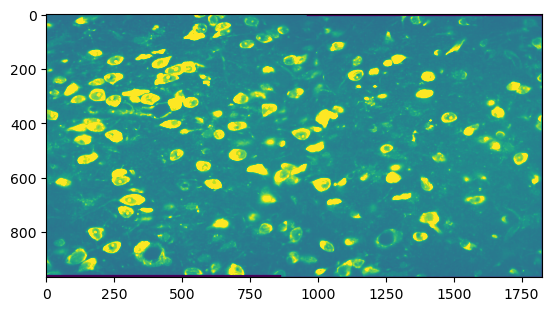

In [39]:
plt.imshow(img_s, 
           vmax=np.percentile(img_s, 95), 
           vmin=np.percentile(img_s, 0.1),)

In [28]:
path = p1 + f'/demo_small_s1_export-ds-try11.n5'
zarr_data = zarr.open(store=zarr.N5Store(path), mode='r')
for c in ['c1']:
    img = zarr_data[f'/{c}/s0'] 
    print(img.shape)
    # print(np.max(img), np.min(img))
    # output = outdir+f'/demo_small_s1-ds-try3_{c}_s3.tiff'
    # print(output)
    # tifffile.imwrite(output, img)

(423, 1921, 3687)


In [33]:
img_s = img[100][::2,::2]
img_s.shape

(961, 1844)

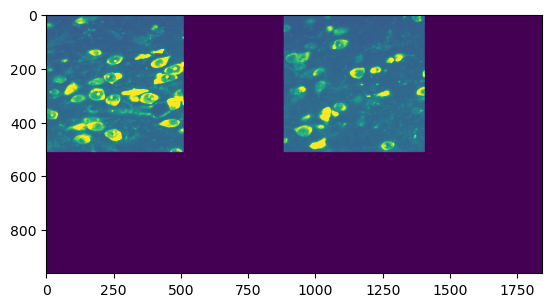

In [34]:
plt.imshow(img_s, 
           vmax=np.percentile(img_s, 99), 
           vmin=np.percentile(img_s, 1),)

# test xml file calc

In [15]:
r = np.array([0.22851993924221545, 0.22851993924221545, 0.421567])

a = np.array([-398.8109999999999, 16317.359999999999, -2584.9859999999994])
b = np.array([4.60900000000004, 16317.359999999999, -2584.9859999999994])


In [16]:
a/r

array([-1745.19125693, 71404.53500079, -6131.85092761])

In [17]:
a/r[0]

array([ -1745.19125693,  71404.53500079, -11311.8619258 ])

In [18]:
b/r[0]

array([ 2.01689184e+01,  7.14045350e+04, -1.13118619e+04])

# check flatfield

In [19]:
import tifffile
ddir = '/u/home/f/f7xiesnm/project-zipursky/easifish/results/flatfield'
file = ddir+'/flatfield_dapi_test_basicpy_s4.tiff'
ff = tifffile.imread(file)

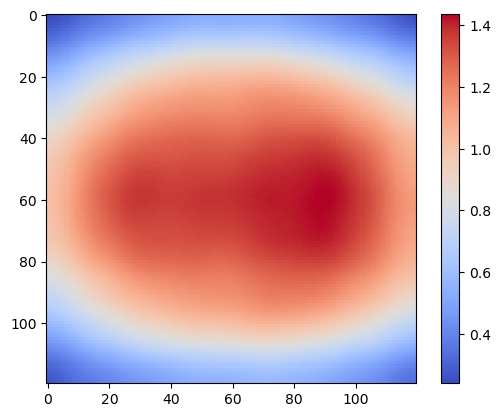

In [20]:
g = plt.imshow(ff, cmap='coolwarm')
plt.colorbar(g)